## Vincent's challenge or who is to get the LEGO

### Notes:

* https://en.wikipedia.org/wiki/Bayesian_information_criterion
* https://docs.pymc.io/notebooks/variational_api_quickstart.html

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
import pymc3 as pm
import theano
import numpy as np
import random
import requests as rq
import seaborn as sns
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from statistics import mean


np.random.seed(42)
pm.set_tt_rng(42)

In [18]:
def get_distance(emb):
    # prepare request
    url = "http://challenge.calmcode.io/attempt/"

    # make request, remember to use your email!
    payload = {"user": "Filip Danieluk",
               "email": "filip.danieluk@cbre.com",
               "emb": emb}

    resp = rq.post(url, json=payload)

    # read response
    return resp.json()

In [670]:
with pm.Model():
#     x = pm.Normal('x', mu=1.36, sigma=.9) # 114.2
#     x = pm.Cauchy('x', alpha=.95, beta=.14) # under 110
#     x = pm.Laplace('x', mu=.95, b=1e-8) # ~110
#     x = pm.StudentT('x', nu=15, mu=0.95, sigma=.1) # 106
    x = pm.StudentT('x', nu=2.6, mu=0.9, sigma=.1) # 106


#     x= pm.

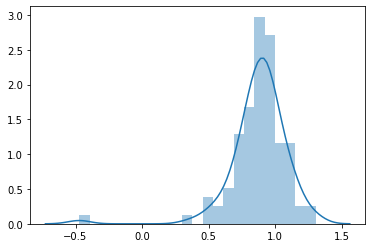

In [671]:
sns.distplot(x.random(size=100))

In [672]:
emb = list(x.random(size=100))

In [695]:
# emb = list(x.random(size=100))
get_distance(emb)

{'distance': 117.0585309008347,
 'datetime': '2020-06-15 17:59:57.496064',
 'user': 'Filip Danieluk',
 'id': '594cc6f7-f783-44c6-8b53-ab3b9751797e'}

In [739]:
def optimize(random_state=23):
    space = {'nu': hp.quniform('nu', 2, 3, .05),
             'mu': hp.quniform('mu', 0.2, 2, 0.1),
             'sigma': hp.quniform('sigma', 0.2, 3, 0.1)}

    best = fmin(score,
                space,
                algo=tpe.suggest, 
                max_evals=50)
    return best

In [740]:
def score(params):
    with pm.Model():
        print(params)
        x = pm.StudentT('x', nu=params['nu'], mu=params['mu'], sigma=params['sigma'])
    emb = list(x.random(size=100))
    
    distances = []
    for i in range(0, 5):
        distances.append(get_distance(emb)['distance'])
    loss = min(distances)
    print(loss, distances)
    print('\n')
    return {'loss': loss, 'status': STATUS_OK}

In [740]:
def score(params):
    with pm.Model():
        print(params)
        x = pm.StudentT('x', nu=params['nu'], mu=params['mu'], sigma=params['sigma'])
    emb = list(x.random(size=100))
    
    distances = []
    for i in range(0, 5):
        distances.append(get_distance(emb)['distance'])
    loss = min(distances)
    print(loss, distances)
    print('\n')
    return {'loss': loss, 'status': STATUS_OK}

In [741]:
optimize()

{'mu': 1.4000000000000001, 'nu': 2.4000000000000004, 'sigma': 2.7}                                                                                       
149.87861350498926                                                                                                                                       
[163.3481261684388, 149.87861350498926, 163.94588879429475, 168.85265908926442, 161.07674293170524]                                                      
{'mu': 1.1, 'nu': 2.8000000000000003, 'sigma': 1.7000000000000002}                                                                                       
119.84052630537958                                                                                                                                       
[134.62663613206857, 137.9118723728884, 119.84052630537958, 138.95178173318217, 120.76059211818621]                                                      
{'mu': 1.6, 'nu': 2.25, 'sigma': 0.30000000000000004}                       

{'mu': 0.6000000000000001, 'nu': 2.6500000000000004, 'sigma': 0.9}

# Parsing JSONs

In [127]:
from pathlib import Path
import pandas as pd
import seaborn as sns

pd.set_option('max_rows', 10000)

In [128]:
raw_path = Path('data/raw')
files = list(raw_path.glob('*.json'))

In [129]:
to_concat = []
for file in files:
    df = pd.read_json(file, lines=True)
    to_concat.append(df)

df = pd.concat(to_concat)

In [130]:
df = df.reset_index(drop=True)
df = df.reset_index()

In [131]:
df.head(1)

,index,user,email,emb,distance,datetime,id
0,0,Filip Danieluk,filip.danieluk@cbre.com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",120.377576,2020-06-16 17:53:24.237814,299e1478-11c5-456c-94d6-60f4741e1fd6


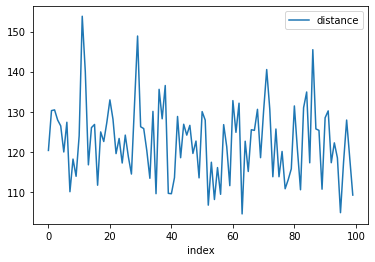

In [132]:
df.head(100).plot(x='index', y='distance', kind='line')

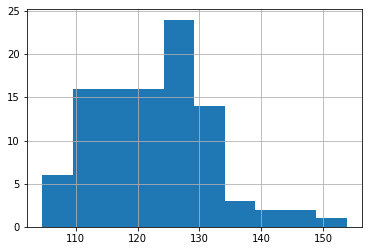

In [133]:
df.distance.hist()

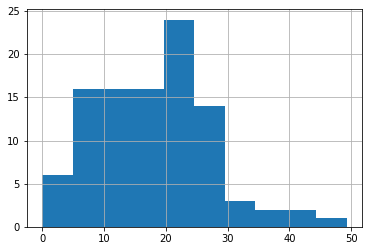

In [135]:
(df.distance - df.distance.min()).hist()